## Code has been sliced into smaller parts to run each function separately

## Install Required Libraires - (Optional if already installed)

In [1]:
!pip install tweepy
!pip install pandas
!pip install requests
!pip install twitter
!pip install matplotlib
!pip install PrettyTable
!pip install Counter
!pip install plotly
!pip install numpy
!pip install wordcloud

## Import Libraries

In [2]:
import tweepy 
import webbrowser
import time
import pandas as pd
from tweepy import OAuthHandler
from IPython.display import display
from tweepy import Stream
from tweepy.streaming import StreamListener
import emoji
import base64
import requests
import pandas as pd
from pandas import DataFrame
from matplotlib import font_manager as fm, rcParams
import matplotlib as plt




## Generate and Provide PIN to access your Project

In [3]:
#Your API KEY AND API SECRET KEYS
consumer_key = "PKBKgfLVoy6iJVSZZGS9Rx7dT"
consumer_secret = "hvUkF7VpV7S1umI6Cs0X6ZKSxCRhTBpwoqOYDQmWBFSKtHn2II"

callback_uri = 'oob'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
redirect_url = auth.get_authorization_url()
print(redirect_url)
webbrowser.open(redirect_url)

#Please Provide your Pin and press "ENTER" once finished. Then run the next line of code 
user_input_pin=input("Please enter your pin: ")

https://api.twitter.com/oauth/authorize?oauth_token=5G2kYQAAAAABPb3KAAABe0wyMWE
Please enter your pin: 4985252


## (Optional, Extra Option) Display information about Your Account

In [4]:
#EXTRA FROM TUTORIAL
#Grab user Pin as confirmation
user_input_pin

#Authenticate access
auth.get_access_token(user_input_pin)
api = tweepy.API(auth)

#Confirm my name
me = api.me()

#Print my pin and my name as double confirmation
print("Your Pin is:", user_input_pin)
print("Your Twitter name is:", me.screen_name)

Your Pin is: 4985252
Your Twitter name is: Drymarti


## Top Trends using Twitter Trends APIs (Geo Localization UK)

In [5]:
#Geo-Localization
uk_woeid=23424975 #geo-localization set to UK with UK Code

#Take trending tweets from UK
tweet_data = api.trends_place(uk_woeid)

#Below's command displays tweets in non-formated way.
#print(tweet_data)

## Trending: list of 10 most popular

In [22]:
#Scrape 10 most popular hashtags in UK

trending_list=[]
for i in range(0,10):
    trending_list.append(tweet_data[0]['trends'][i])
    
pd.DataFrame(trending_list)
pd.DataFrame.from_dict(trending_list)
df=pd.DataFrame.from_records(trending_list)


#Show Graph with found hashtags
import plotly.express as px
fig = px.bar(df, x='tweet_volume', y='name')
fig.show()

#show list of 50 most popular hashtags
df


,name,url,promoted_content,query,tweet_volume
0,Jake,http://twitter.com/search?q=Jake,None,Jake,149370.0
1,Toby,http://twitter.com/search?q=Toby,None,Toby,36301.0
2,Toby,http://twitter.com/search?q=Toby,None,Toby,36301.0
3,Priya,http://twitter.com/search?q=Priya,None,Priya,32673.0
4,#LoveIslandUK,http://twitter.com/search?q=%23LoveIslandUK,None,%23LoveIslandUK,NaN
5,Mary and Aaron,http://twitter.com/search?q=%22Mary+and+Aaron%22,None,%22Mary+and+Aaron%22,NaN
6,#Afghanistan,http://twitter.com/search?q=%23Afghanistan,None,%23Afghanistan,627694.0
7,#WIvPAK,http://twitter.com/search?q=%23WIvPAK,None,%23WIvPAK,16883.0
8,Faye and Teddy,http://twitter.com/search?q=%22Faye+and+Teddy%22,None,%22Faye+and+Teddy%22,NaN
9,#talkswithash,http://twitter.com/search?q=%23talkswithash,None,%23talkswithash,NaN


## Trending: list of 30 most popular

In [23]:
#Scrape 30 most popular hashtags in UK

trending_list=[]
for i in range(0,30):
    trending_list.append(tweet_data[0]['trends'][i])
    
pd.DataFrame(trending_list)
pd.DataFrame.from_dict(trending_list)
df=pd.DataFrame.from_records(trending_list)


#Show Graph with found hashtags
import plotly.express as px
fig = px.bar(df, x='tweet_volume', y='name')
fig.show()

#show list of 50 most popular hashtags
df


,name,url,promoted_content,query,tweet_volume
0,Jake,http://twitter.com/search?q=Jake,None,Jake,149370.0
1,Toby,http://twitter.com/search?q=Toby,None,Toby,36301.0
2,Toby,http://twitter.com/search?q=Toby,None,Toby,36301.0
3,Priya,http://twitter.com/search?q=Priya,None,Priya,32673.0
4,#LoveIslandUK,http://twitter.com/search?q=%23LoveIslandUK,None,%23LoveIslandUK,NaN
5,Mary and Aaron,http://twitter.com/search?q=%22Mary+and+Aaron%22,None,%22Mary+and+Aaron%22,NaN
6,#Afghanistan,http://twitter.com/search?q=%23Afghanistan,None,%23Afghanistan,627694.0
7,#WIvPAK,http://twitter.com/search?q=%23WIvPAK,None,%23WIvPAK,16883.0
8,Faye and Teddy,http://twitter.com/search?q=%22Faye+and+Teddy%22,None,%22Faye+and+Teddy%22,NaN
9,#talkswithash,http://twitter.com/search?q=%23talkswithash,None,%23talkswithash,NaN


## Trending: list of 50 most popular

## Extracting Tweets with specific keyword

In [21]:
#Scrape 50 most popular hashtags in UK

trending_list=[]
for i in range(0,50):
    trending_list.append(tweet_data[0]['trends'][i])
    
pd.DataFrame(trending_list)
pd.DataFrame.from_dict(trending_list)
df=pd.DataFrame.from_records(trending_list)

#Show Graph with found hashtags
import plotly.express as px
fig = px.bar(df, x='tweet_volume', y='name')
fig.show()

#show list of 50 most popular hashtags
df


,name,url,promoted_content,query,tweet_volume
0,Jake,http://twitter.com/search?q=Jake,None,Jake,149370.0
1,Toby,http://twitter.com/search?q=Toby,None,Toby,36301.0
2,Toby,http://twitter.com/search?q=Toby,None,Toby,36301.0
3,Priya,http://twitter.com/search?q=Priya,None,Priya,32673.0
4,#LoveIslandUK,http://twitter.com/search?q=%23LoveIslandUK,None,%23LoveIslandUK,NaN
5,Mary and Aaron,http://twitter.com/search?q=%22Mary+and+Aaron%22,None,%22Mary+and+Aaron%22,NaN
6,#Afghanistan,http://twitter.com/search?q=%23Afghanistan,None,%23Afghanistan,627694.0
7,#WIvPAK,http://twitter.com/search?q=%23WIvPAK,None,%23WIvPAK,16883.0
8,Faye and Teddy,http://twitter.com/search?q=%22Faye+and+Teddy%22,None,%22Faye+and+Teddy%22,NaN
9,#talkswithash,http://twitter.com/search?q=%23talkswithash,None,%23talkswithash,NaN


In [24]:
def scrape(words, date_since, numtweet):
      
    # Pandas post informations
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following',
                               'followers', 'totaltweets', 'retweetcount','likes','text', 'hashtags'])
      
    # We are using .Cursor() to search through twitter for the required tweets.
    # The number of tweets can be restricted using .items(number of tweets)
    tweets = tweepy.Cursor(api.search, q=words, lang="en",
                           since=date_since, tweet_mode='extended').items(numtweet)
     

    # claiming information about tweets
    list_tweets = [tweet for tweet in tweets]
      
    # Counting Tweets
    i = 1  
      
    # Following list is being prepared and shown as results
    for tweet in list_tweets:
        username = tweet.user.screen_name
        description = tweet.user.description
        location = tweet.user.location
        following = tweet.user.friends_count
        followers = tweet.user.followers_count
        totaltweets = tweet.user.statuses_count
        retweetcount = tweet.retweet_count
        likes = tweet.favorite_count
        
        
        hashtags = tweet.entities['hashtags']
          
        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text
        hashtext = list()
        for j in range(0, len(hashtags)):
            hashtext.append(hashtags[j]['text'])
          
        # Put all data to dataframe
        ith_tweet = [username, description, location, following,
                     followers, totaltweets, retweetcount, likes, text, hashtext]
        db.loc[len(db)] = ith_tweet
          
#save all of those to my_tweets.csv file
    filename = 'my_tweets.csv'
      
    # saving our database as a CSV file.
    db.to_csv(filename)
    
   

 
    # Specify thee word to be filtered from the tweets. It already is adding # before the hashtag keyword
print("What hashtag would you like to analyze?")
words = "#" + input()
print("From what date are you looking for tweets from? Format: yyyy-mm-dd")
date_since = input()
      
    # number of tweets you want to extract in one run
numtweet = 10  
scrape(words, date_since, numtweet)
print('Done! You can move on!')


#display the data
data=pd.read_csv('my_tweets.csv')
data


What hashtag would you like to analyze?
nike
From what date are you looking for tweets from? Format: yyyy-mm-dd
2015-02-15
Done! You can move on!


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,likes,text,hashtags
0,0,heyitshendrix,VI.VI.MMXVII 💙,w/ Eden,1715,229,28898,1,0,Restocked on #Nike US.\nNike Blazer Mid ’77 Fi...,"['Nike', 'ad']"
1,1,swooshsupply,"Nike Releases, Restocks, and News by @712LINKS...","Beaverton, OR",5,30267,18420,1,1,Restocked on #Nike US.\nNike Blazer Mid ’77 Fi...,"['Nike', 'ad']"
2,2,sportsntiques,"I've been selling Antiques, Sportswear and oth...",Illinois,640,595,13363,0,0,Check out J.J.Watt #99 Houston Texans NFL Yout...,['Nike']
3,3,ItsK_viin,It is just a chess game until checkmate it ain...,Kenia,1592,4188,11746,1005,0,Not every day you get to kick a ball about wit...,"['Hero', 'legend']"
4,4,Rakesur_R,💙 Chelsea Football Club 💙 @ChelseaF...,"Busan, Republic of Korea",490,4987,57836,1005,0,Not every day you get to kick a ball about wit...,"['Hero', 'legend']"
5,5,WediahIsBig,Blogger || Man U fan || Accra Hearts of Oak Fan,Somewhere,1995,2033,1602,1005,0,Not every day you get to kick a ball about wit...,"['Hero', 'legend']"
6,6,swagafiedkicks,NaN,NaN,41,936,134200,1,0,https://t.co/UmmnsB3N1c #NIKE AIR ZOOM Basketb...,['NIKE']
7,7,DameTague1,Africains✊ ' Sénégalais🇸🇳 ' mouride ❤️ ' entre...,NaN,697,428,3105,1005,0,Not every day you get to kick a ball about wit...,"['Hero', 'legend']"
8,8,IamDMarge,Educating and inspiring men since 2012,Australia,48,5618,26159,0,0,"Best Winter Shoes For Men Wanting Style, Warmt...","['Adidas', 'Allbirds', 'Casca', 'ECCO', 'Forsa..."
9,9,MatchdaySoc,University of Warwick. We attend football matc...,University of Warwick,119,56,392,1005,0,Not every day you get to kick a ball about wit...,"['Hero', 'legend']"


In [25]:
#One Plot having all data at once
import plotly.express as px
fig = px.bar(data, x=['totaltweets','retweetcount','likes'], y='username')
fig.show()


#extra plot to see retweets only
import plotly.express as px
fig = px.bar(data, x=['retweetcount'], y='username')
fig.show()



## WordCloud functionality

In [26]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)
  
# search using csv file
for val in data['hashtags']:
    
    
      
    # change val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # EXTRAS: converting outputs to lowercase
    for i in range(len(tokens)):
        
        tokens[i] = tokens[i].lower()
      
    #Attach words to be described from tokens
        comment_words += " ".join(tokens)+" "
  
    #generate words over the squared map
    wordcloud = WordCloud(width = 700, height = 700,
                background_color ='#451313',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

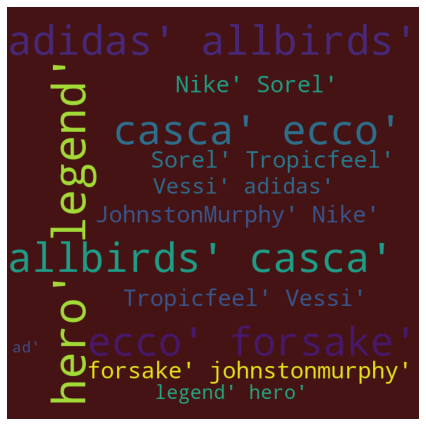

In [28]:
#Show WordCloud picture
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 1)
  
plt.show()
